In [31]:
# Heart Disease Prediction 

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

In [32]:
# Step 2: Load Dataset
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\heart_disease_uci.csv")

In [33]:
# Step 3: Drop 'id' and 'dataset' columns IF they exist
for col in ['id', 'dataset']:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

In [34]:
# Step 4: Handle 'num' as target column (if exists)
if 'num' in df.columns:
    df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
    df.drop('num', axis=1, inplace=True)

In [35]:
# Step 5: Handle categorical columns (factorize object types)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.factorize(df[col])[0]

In [36]:
# Step 6: Handle missing values (fill with mean)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

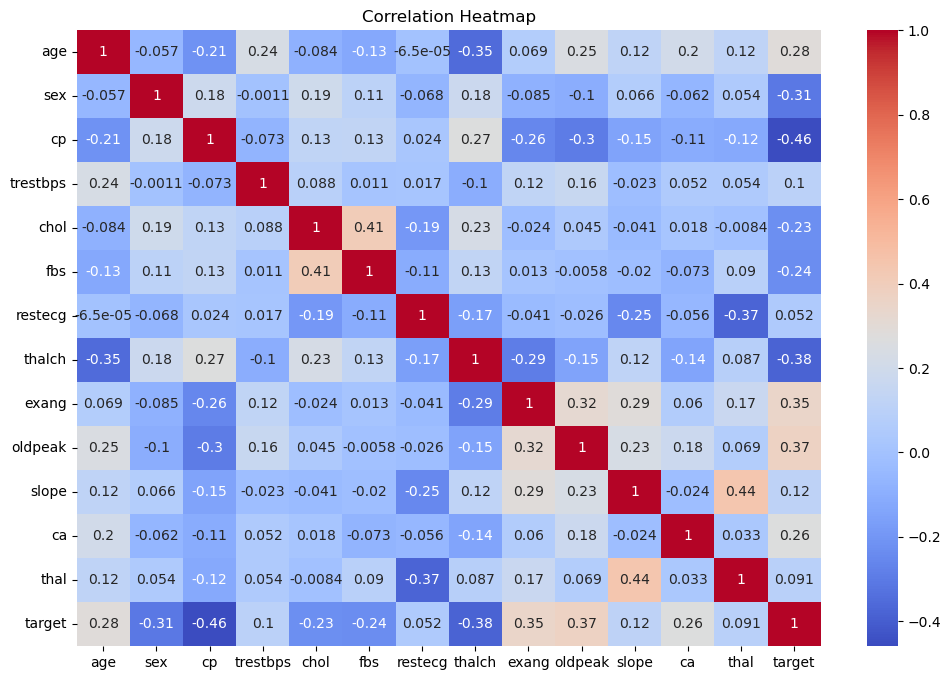

In [37]:
# Step 7: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [38]:
# Step 8: Split features and target
X = df_imputed.drop('target', axis=1)
y = df_imputed['target']

In [39]:
# Step 9: Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Step 10: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
# Step 11: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Step 12: Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [43]:
# Step 13: Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7934782608695652


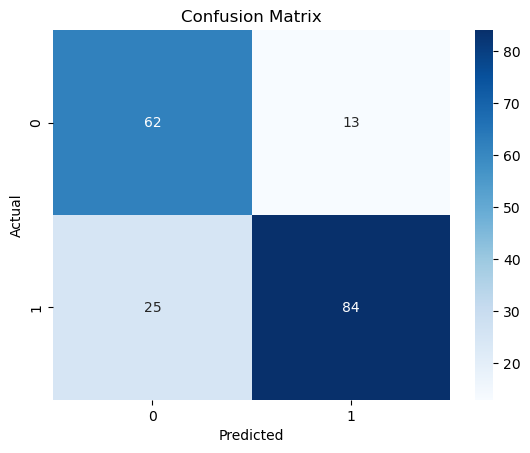

In [44]:
# Step 14: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


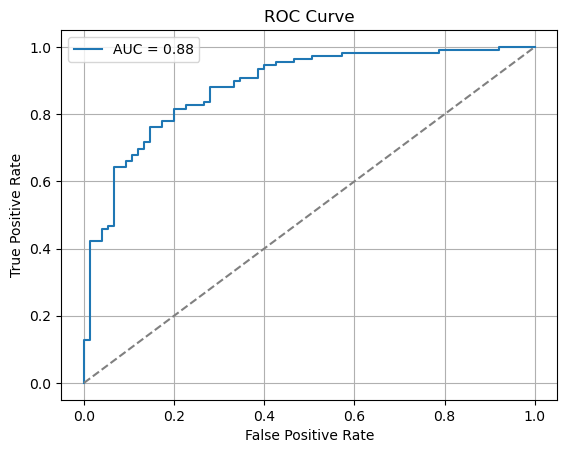

In [45]:
# Step 15: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

In [46]:
# Step 16: Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77        75
         1.0       0.87      0.77      0.82       109

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.80      0.79      0.80       184



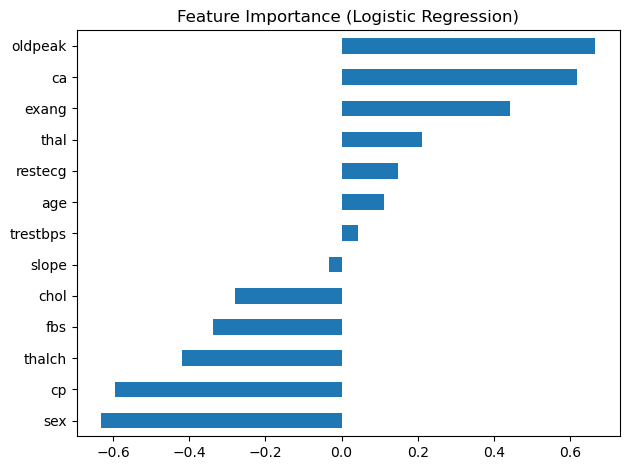

In [47]:
# Step 17: Feature Importance Plot
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', title="Feature Importance (Logistic Regression)")
plt.tight_layout()
plt.show()